In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

MODELS_FOLDER = "../models"

IMPL = "fixslice"
TARGET = "2sbox"
BYTE = 1
ARCH = "zhang"

TRACE_START = 0
TRACE_END = 1000

MODEL_NAME = f"{IMPL}-{TARGET}-byte{BYTE}-{ARCH}-{TRACE_START}_{TRACE_END}"

METADATA_PATH = f"{MODELS_FOLDER}/{MODEL_NAME}/metadata.json"

with open(METADATA_PATH, 'r') as f:

    metadata = json.load(f)

loss1, val_performance1 = metadata["scores"]

epochs = len(loss1)

In [2]:
MODELS_FOLDER = "../models"

IMPL = "fixslice"
TARGET = "2sbox..."
BYTE = 1
ARCH = "zhang"

TRACE_START = 0
TRACE_END = 1000

MODEL_NAME = f"{IMPL}-{TARGET}-byte{BYTE}-{ARCH}-{TRACE_START}_{TRACE_END}"

METADATA_PATH = f"{MODELS_FOLDER}/{MODEL_NAME}/metadata.json"

with open(METADATA_PATH, 'r') as f:

    metadata = json.load(f)

loss2, val_performance2 = metadata["scores"]

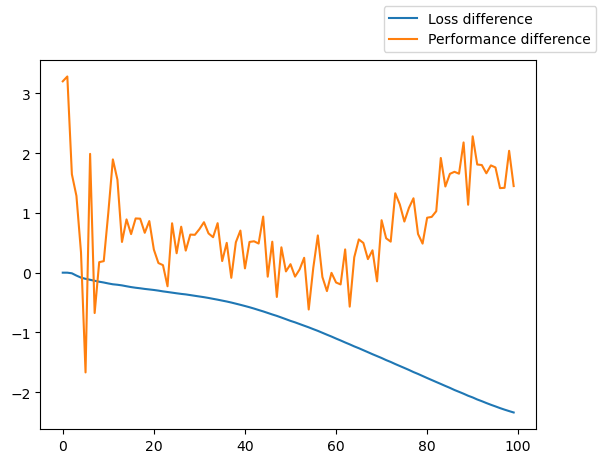

In [3]:
# High values mean model 2 is better
loss_diff = (np.array(loss2) - np.array(loss1))
val_diff = (np.array(val_performance2) - np.array(val_performance1))

fig, ax = plt.subplots(1,1)

ax.plot(loss_diff, label='Loss difference')
ax.plot(val_diff, label='Performance difference')

fig.legend()

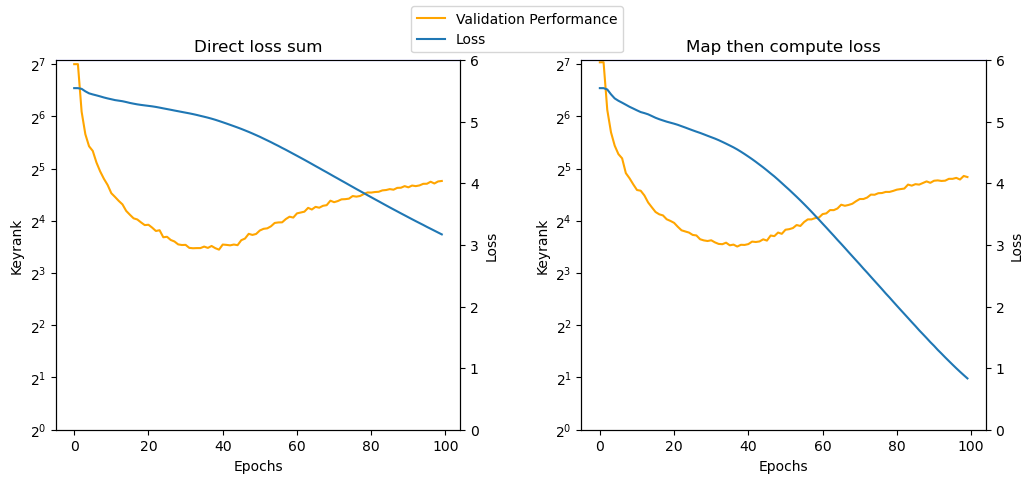

In [18]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(12.0)
plt.subplots_adjust(wspace=0.3)

#fig.set_tight_layout(tight=True)

labels_handles = {}

for ax, val, loss, title in zip(axs, [val_performance1, val_performance2], [loss1, loss2], ["Direct loss sum", "Map then compute loss"]):
    ax.spines['top'].set_color("blue")

    ax.set_title(title)

    # Left side 
    l1, = ax.plot(np.arange(epochs), val, color="orange", label="Validation Performance")
    ax.set_yscale("log", base=2)


    # Right side
    ax2 = ax.twinx()
    l2, = ax2.plot(np.arange(epochs), loss,  label="Loss")

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Keyrank")
    ax2.set_ylabel("Loss")

    # Scale
    ax.set_ybound(1.0, 135.0)
    ax2.set_ybound(0.0, 6.0)

    labels_handles[l1.get_label()] = l1
    labels_handles[l2.get_label()] = l2


fig.legend(labels_handles.values(), labels_handles.keys(), loc='upper center')



plt.show()